# Shifting peaks: Data analysis

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Imports

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from constants import PATH_PURE_COMPONENTS, PATH_MIXTURES, X
from file_io import load_pickle_file
from nnls_fit_with_x_axis_correction import analysis
from utils import calculate_signal, nnls_fit

## Load data

In [3]:
library = load_pickle_file(PATH_PURE_COMPONENTS)
mixtures_data = load_pickle_file(PATH_MIXTURES)

## Analyze data

In [4]:
results = []
for i, sample in enumerate(mixtures_data, 1):
    print(f'{i}/{len(mixtures_data)}')
    true_concentrations = sample['concentrations']
    signal = sample['signal']
    result = [true_concentrations[-1],
              nnls_fit(signal, library)[-1],
              analysis(X, signal, library)[0][-1]]
    results.append(result)
results = np.array(results)

1/100
2/100
3/100
4/100
5/100
6/100
7/100
8/100
9/100
10/100
11/100
12/100
13/100
14/100
15/100
16/100
17/100
18/100
19/100
20/100
21/100
22/100
23/100
24/100
25/100
26/100
27/100
28/100
29/100
30/100
31/100
32/100
33/100
34/100
35/100
36/100
37/100
38/100
39/100
40/100
41/100
42/100
43/100
44/100
45/100
46/100
47/100
48/100
49/100
50/100
51/100
52/100
53/100
54/100
55/100
56/100
57/100
58/100
59/100
60/100
61/100
62/100
63/100
64/100
65/100
66/100
67/100
68/100
69/100
70/100
71/100
72/100
73/100
74/100
75/100
76/100
77/100
78/100
79/100
80/100
81/100
82/100
83/100
84/100
85/100
86/100
87/100
88/100
89/100
90/100
91/100
92/100
93/100
94/100
95/100
96/100
97/100
98/100
99/100
100/100


## Show results

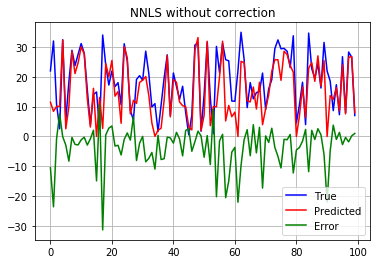

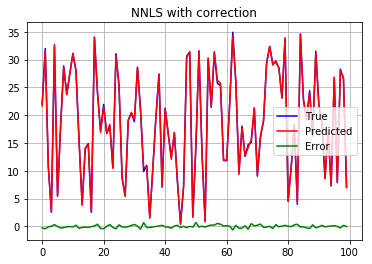

In [5]:
_ = plt.figure()
_ = plt.plot(results[:, 0], 'b-', results[:, 1], 'r-', results[:, 1] - results[:, 0], 'g-')
plt.grid()
_ = plt.title('NNLS without correction')
_ = plt.legend(['True', 'Predicted', 'Error'])
plt.show()

_ = plt.figure()
_ = plt.plot(results[:, 0], 'b-', results[:, 2], 'r-', results[:, 2] - results[:, 0], 'g-')
plt.grid()
_ = plt.title('NNLS with correction')
_ = plt.legend(['True', 'Predicted', 'Error'])
plt.show()

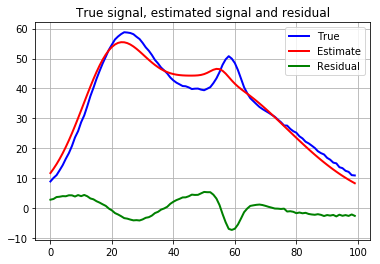

Prediction without correction [ 76.20342659 347.5650113    8.41862743]
Prediction with correction (array([ 92.80471231, 308.41784082,  31.54840513]), array([-4.19118371e-04,  4.51934144e-03, -2.26647873e+00]))
True concentrations [ 92.87183249 308.09764064  31.97847287]


In [6]:
index = 1
true_concentrations = mixtures_data[index]['concentrations']
signal = mixtures_data[index]['signal']

prediction0 = nnls_fit(signal, library)
prediction = analysis(X, signal, library)

signal_estimate = calculate_signal(prediction0, library)
residual = signal_estimate - signal

_ = plt.plot(signal, 'b', linewidth=2, label='True')
_ = plt.plot(signal_estimate, 'r', linewidth=2, label='Estimate')
_ = plt.plot(residual, 'g', linewidth=2, label='Residual')
plt.grid()
_ = plt.title('True signal, estimated signal and residual')
_ = plt.legend()
plt.show()

print('Prediction without correction', prediction0)
print('Prediction with correction', prediction)
print('True concentrations', true_concentrations)